# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goal

Build a Logistic Regression model to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#importing dataset
lead=pd.read_csv("Leads.csv")

### Data Inspection

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Cleaning the data

Checking the percentage of missing values in all columns

In [7]:
(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Upon inspecting the data we found that there are many values in some columns which are market as 'Select' 
     there is no specific option given so we will replace the select valus as 'Null'''

In [8]:
lead=lead.replace('Select',np.nan)

In [9]:
#again checking the null values percentage
missing_values=(lead.isnull().mean().round(4)*100).sort_values(ascending=False)
print(list[missing_values])

list[How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agr

In [10]:
#dropping the columns which have null values more than 40%
col=missing_values[missing_values>40].index
list(col)

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [11]:
lead.drop(columns=col,inplace=True)

In [12]:
lead.shape

(9240, 30)

In [13]:
lead.isnull().mean().round(4) * 100

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

##### Lets analyze columns one by one


1) City

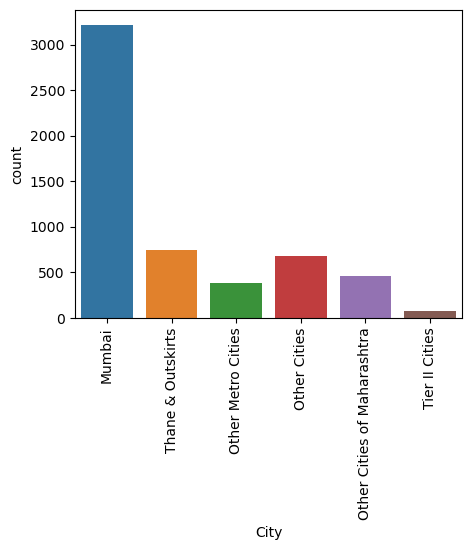

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x='City',data=lead)
plt.xticks(rotation=90)
plt.show()

In [15]:
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
#we can impute null values in this column with 'Mumbai' as most of the values are mumbai
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [17]:
lead['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

2) Tags

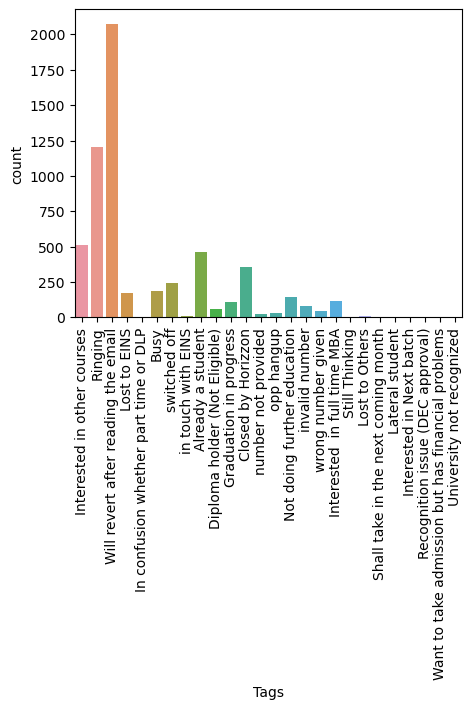

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='Tags',data=lead)
plt.xticks(rotation=90)
plt.show()

In [19]:
##we can impute null values in this column with 'Will revert after reading the email'.
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [20]:
lead['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

3) What matters most to you in choosing a course 

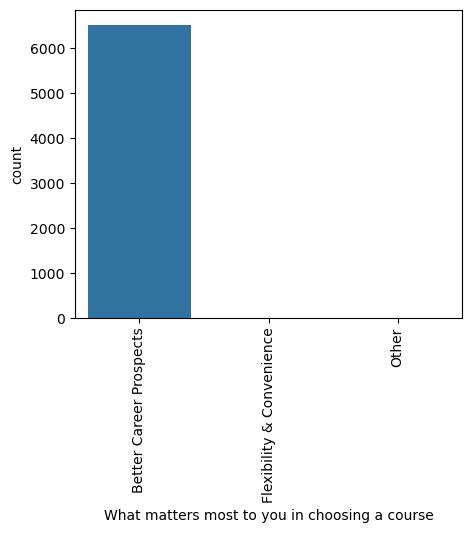

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='What matters most to you in choosing a course',data=lead)
plt.xticks(rotation=90)
plt.show()

In [22]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

4) What is your current occupation 

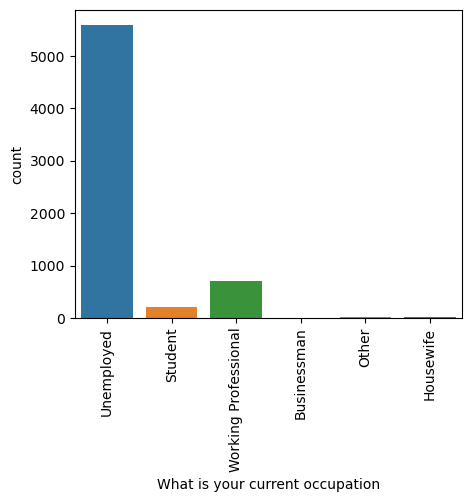

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x='What is your current occupation',data=lead)
plt.xticks(rotation=90)
plt.show()

In [24]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

5) Specialization

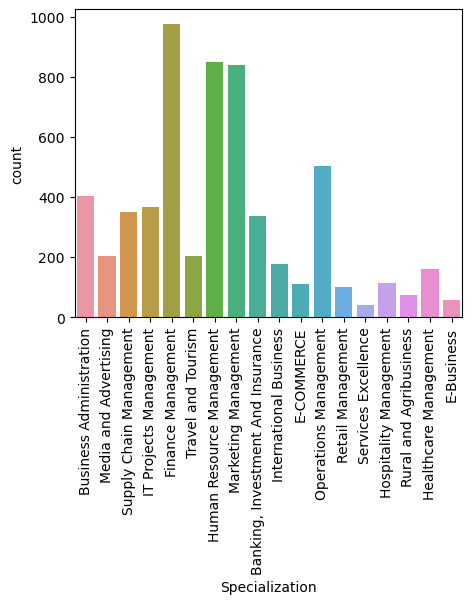

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='Specialization',data=lead)
plt.xticks(rotation=90)
plt.show()

There are 36.5% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he/she is a student or specialization is not there in the options given. So we can create a another category 'Others' for this.

In [26]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'Others')

6) Country

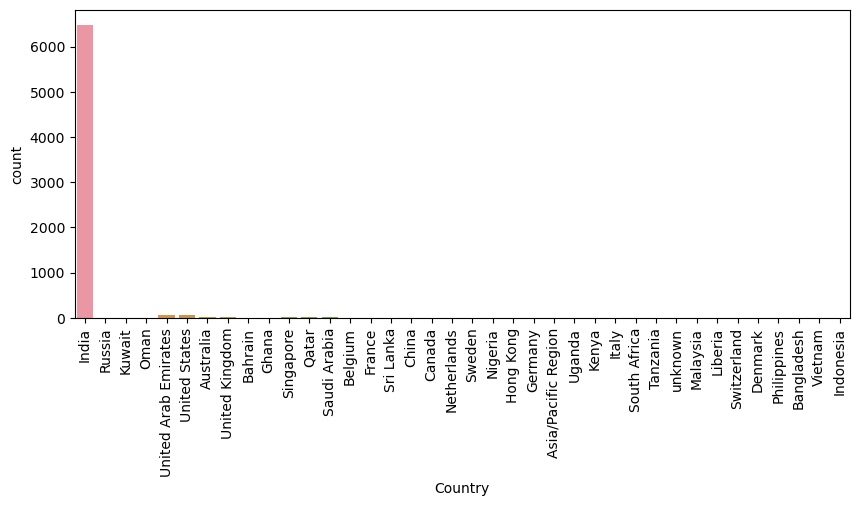

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Country',data=lead)
plt.xticks(rotation=90)
plt.show()

In [28]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [29]:
#once agin checking the null value percentage
lead.isnull().mean().round(4) * 100

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [30]:
#the remaining coulmns have less than 2% of null values so let's remove those rows from columns
lead.dropna(inplace = True)

In [31]:
lead.isnull().mean().round(4) * 100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

now we dont have any missing values

In [32]:
# Checking the Percentage of rows retained
(len(lead.index)/9240)*100

98.2034632034632

In [33]:
lead.shape

(9074, 30)

We have retained 98 percent rows after data cleaning

## Exploratory Data Analysis

In [34]:
#Checking for duplicates
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates in the data.

### Univariate and Bivariate Analysis

1) **Converted**

Converted value of 1 means that the lead was converted and 0 means it was not.

In [35]:
lead.Converted.value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

We have 38 percent leads data which was converted. Data is slightly imbalanced.

In [36]:
#adding all non-numerical columns to a list
lead_obj_col=lead.select_dtypes(include=object).columns.tolist()
lead_obj_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [37]:
#Checking unique values in categorical columns
for i in lead_obj_col:
    print(lead[i].value_counts())
    print('\n' '\n')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64



Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64



Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media  

In [38]:
#creating function to plot categorical variables
def countplot(data,column):
    plt.title('Count plot of column: '+column)
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=data, hue='Converted')
    plt.show()

2) **Lead Origin**

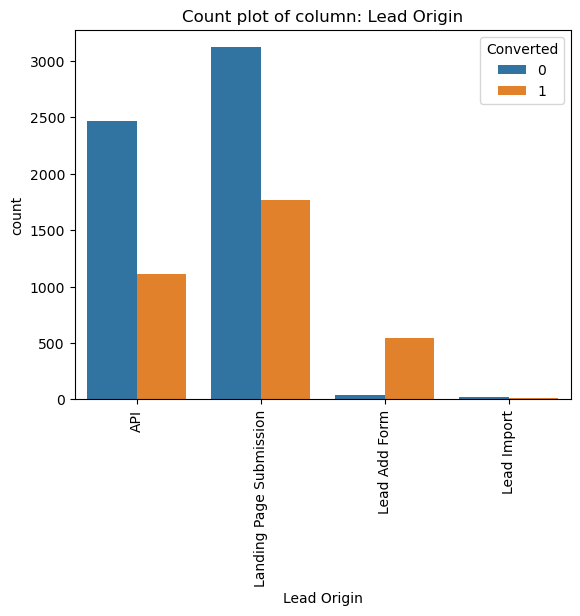

In [39]:
countplot(lead,'Lead Origin')

1. API and Landing Page Submission have a bit lower conversion rate but count of lead originated from them are considerable.<br>
2. Lead Add Form has more than 90% conversion rate but count of leads are not very high.

3. **Lead Source**

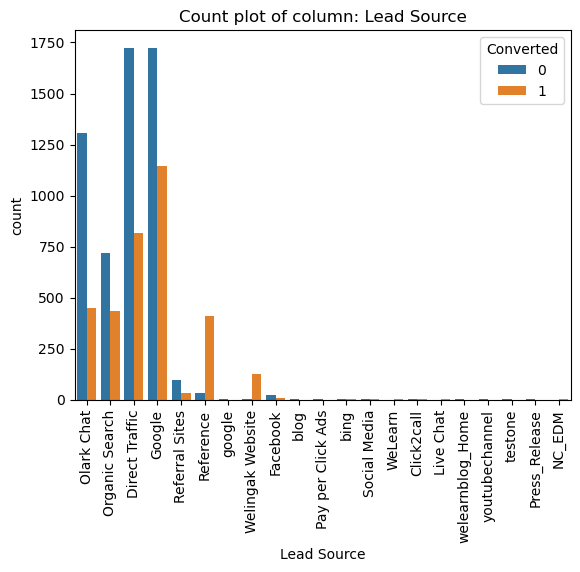

In [40]:
countplot(lead,'Lead Source')

We can see that Google and google are treated separately.

In [41]:
# Replacing 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [42]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

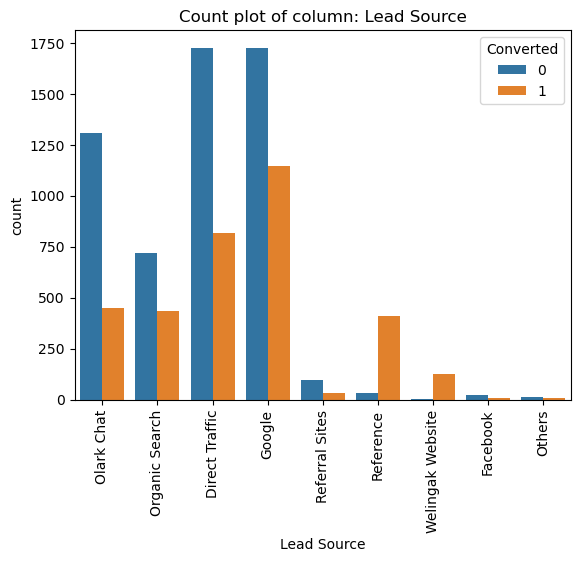

In [43]:
#Visualising again
countplot(lead,'Lead Source')

Observation:
    1) The conversion of leads from welingak website is maximum. <br>
    2) The leads generated from google and direct link is high but conversion is minimum.

4. **Last Activity**

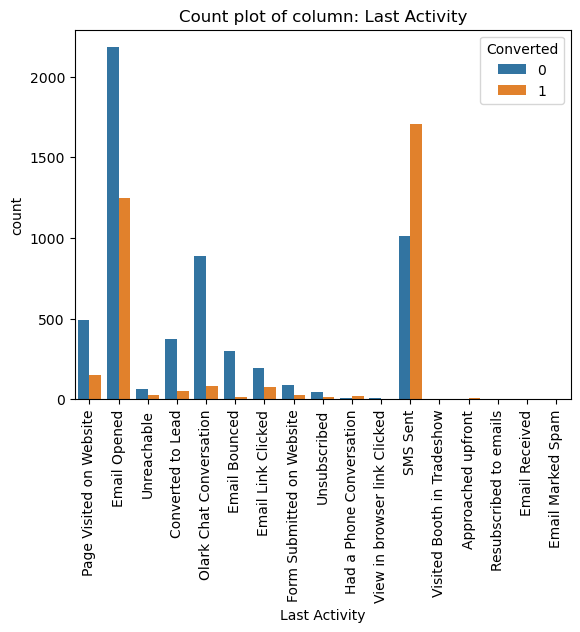

In [44]:
countplot(lead,'Last Activity')

In [45]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
# We can club the last activities to "Other_Activity" which are having less data.
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

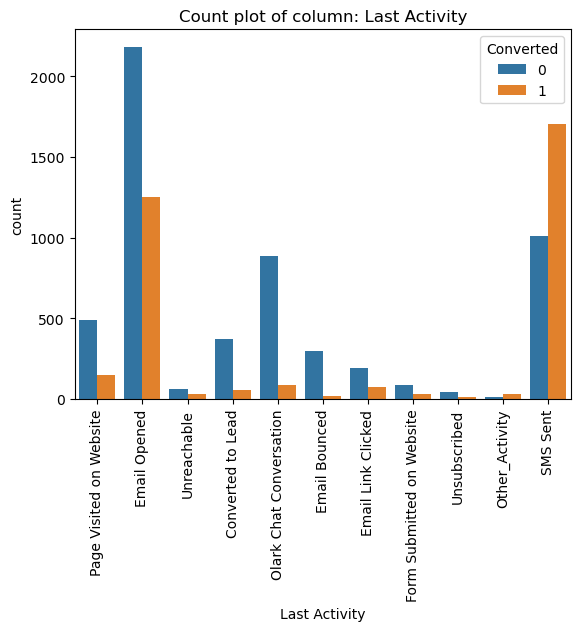

In [47]:
# Visualizing again
countplot(lead,'Last Activity')

1. conversion rate is maximum for SMS sent coulmn <br>
2. Most of the leads have 'Email Opened' as the last activity.

5. **Through Recommendation**

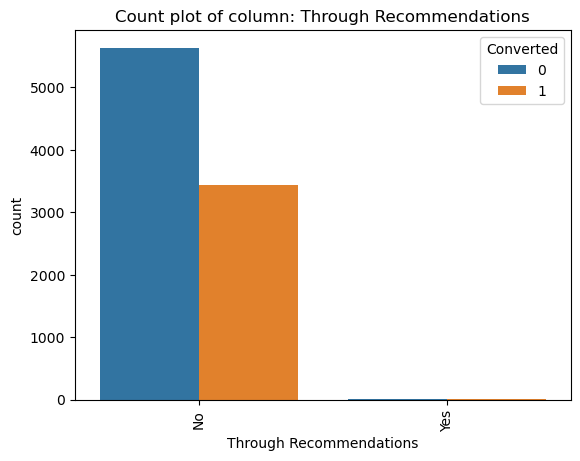

In [48]:
countplot(lead,'Through Recommendations')

6. **A free copy of Mastering the interview**

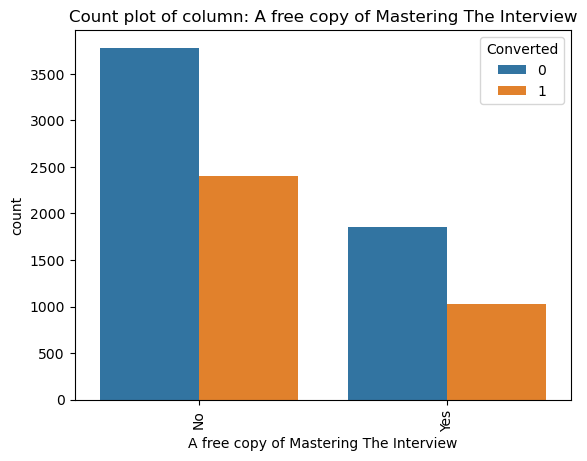

In [49]:
countplot(lead,'A free copy of Mastering The Interview')

7. **Specialization**

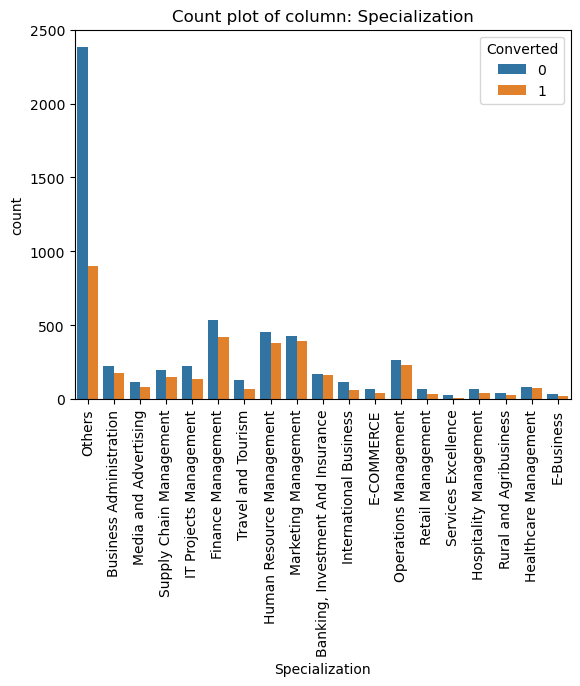

In [50]:
countplot(lead,'Specialization')

8. **Current Occupation**

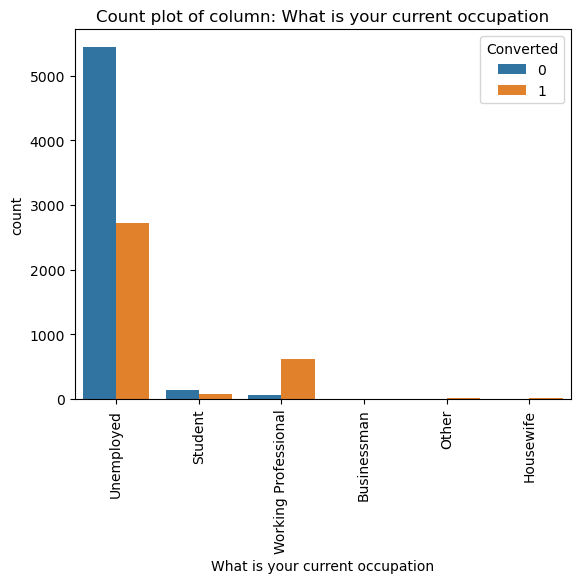

In [51]:
countplot(lead,'What is your current occupation')

we can see that working professional has higher conversion rate as compared to unemployed which has maximum number of leads.

9. **Search**

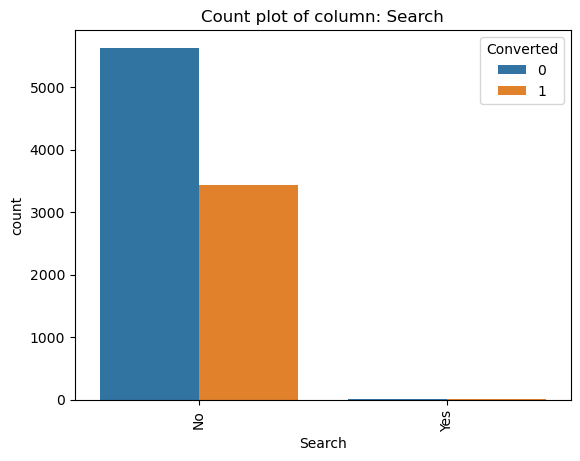

In [52]:
countplot(lead,'Search')

10. **Magazine**

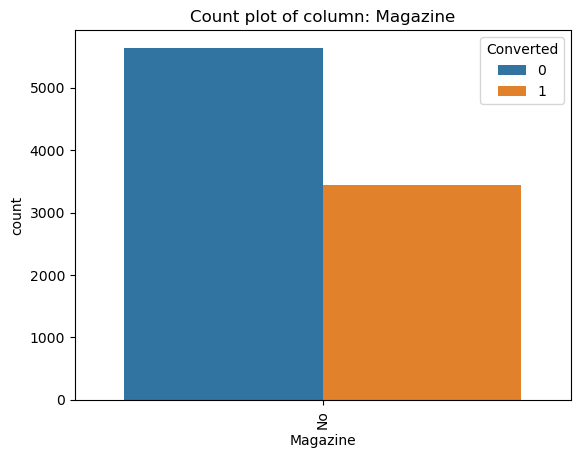

In [53]:
countplot(lead,'Magazine')

All entries are 'No'. we can drop this column

11. **Newspaper Article**

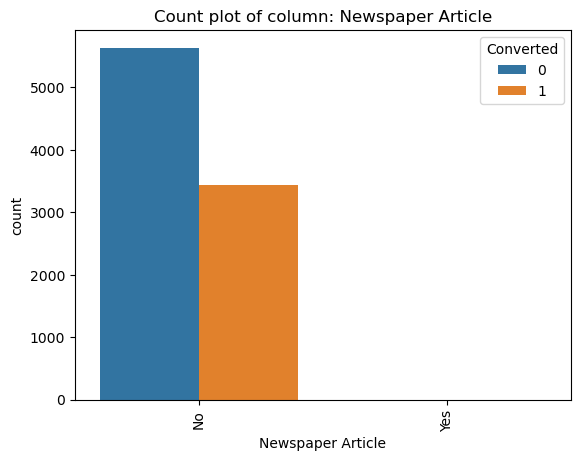

In [54]:
countplot(lead,'Newspaper Article')

Almost all entries are No.

12. **X Education Forums**

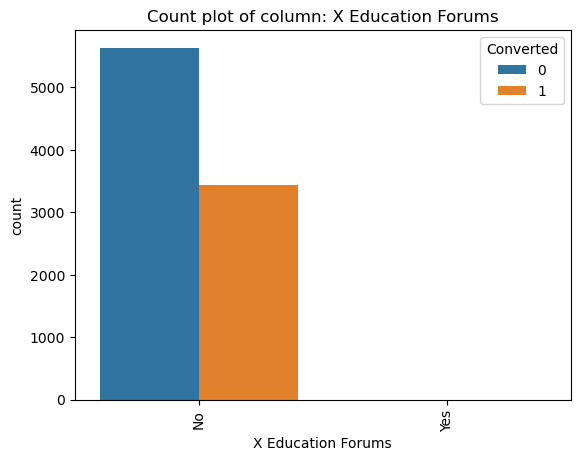

In [55]:
countplot(lead,'X Education Forums')

Maximum entries are No.

13. **Receive more update about course**

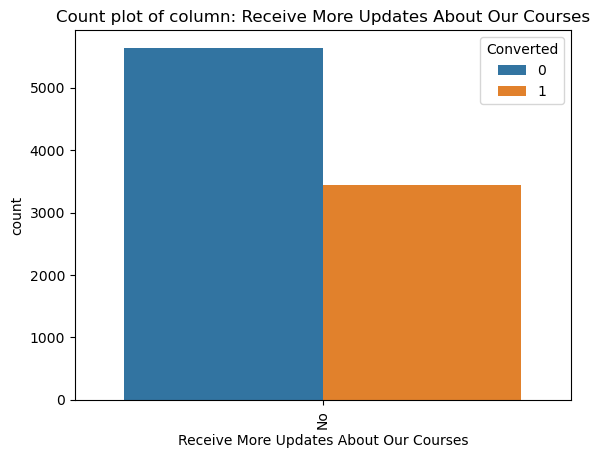

In [56]:
countplot(lead,'Receive More Updates About Our Courses')

All entries are No. we can drop this column.

14. **Tags**

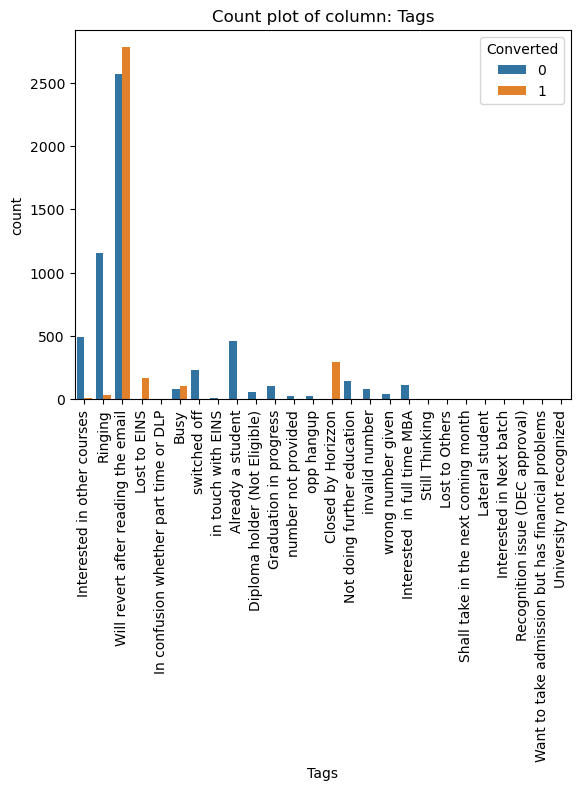

In [57]:
countplot(lead,'Tags')

we can see that will revert after reading the Email have maximum conversion rate

15. **Update on Supply chain content**

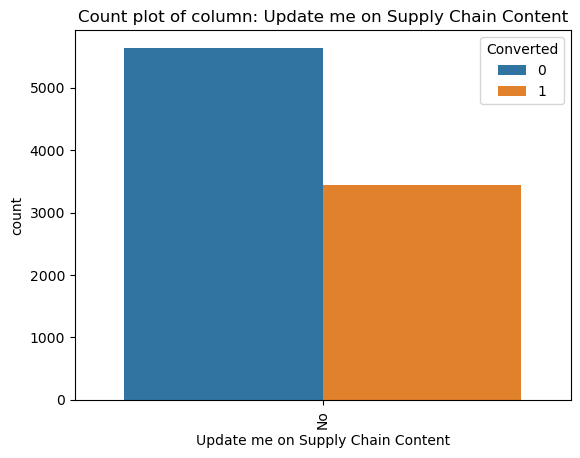

In [58]:
countplot(lead,'Update me on Supply Chain Content')

All entries are No so we can drop this column.

16. **Get updates on DM content**

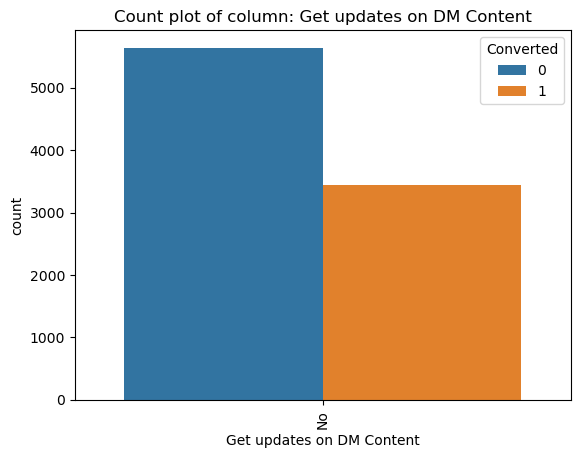

In [59]:
countplot(lead,'Get updates on DM Content')

All entries are No so we can drop this column

17. **City**

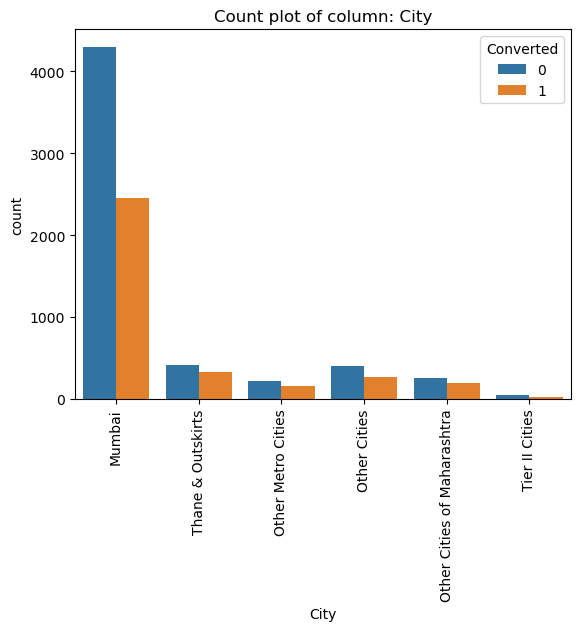

In [60]:
countplot(lead,'City')

Mumbai city have most converted leads

18. **I agree to pay amount through cheque**

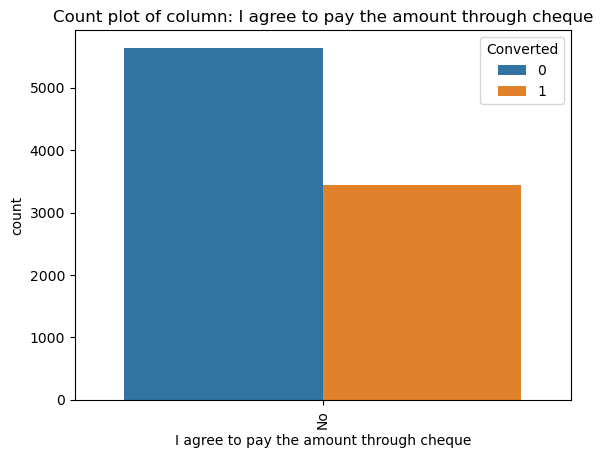

In [61]:
countplot(lead,'I agree to pay the amount through cheque')

All entries are No so we can drop this column.

19. **Last Notable Activity**

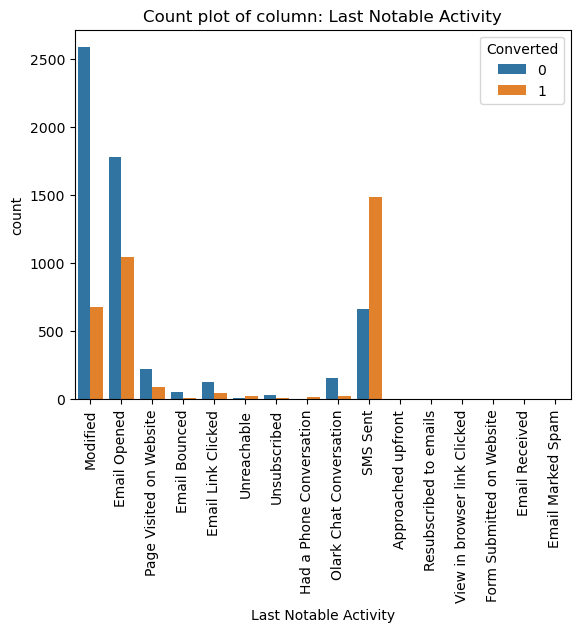

In [62]:
countplot(lead,'Last Notable Activity')

20. **Do not Call**

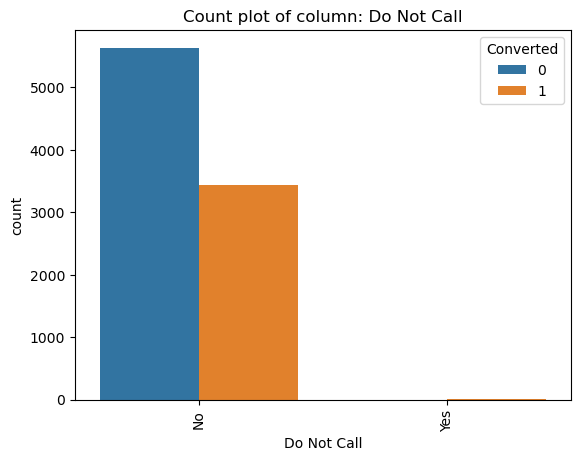

In [63]:
countplot(lead,'Do Not Call')

Maximum entries are 'No' in this column.

21. **Do not Email**

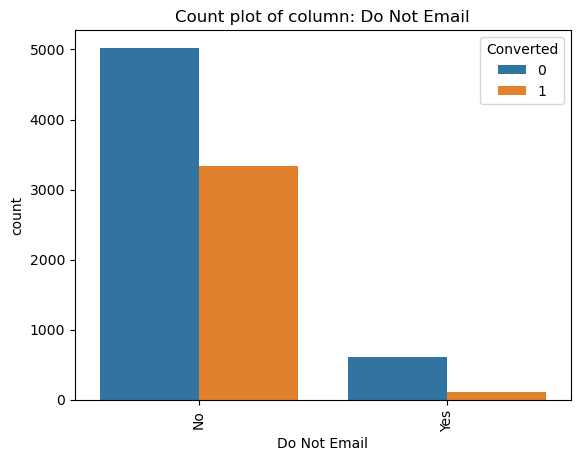

In [64]:
countplot(lead,'Do Not Email')

22. **Country**

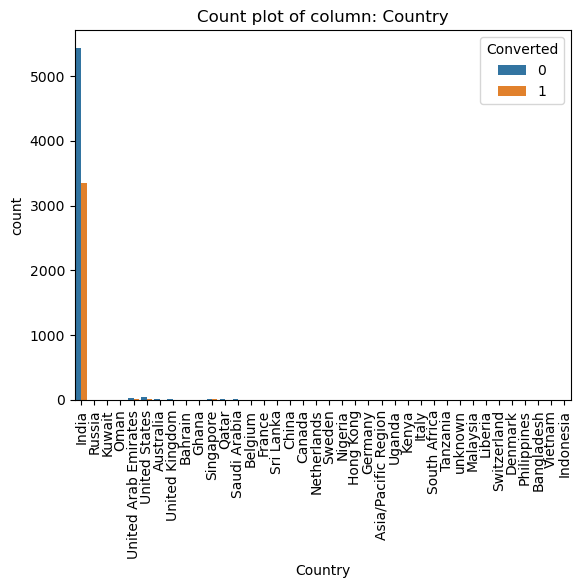

In [65]:
countplot(lead,'Country')

Most values are India so inference can be drawn.

23. **Digital Advertisement**

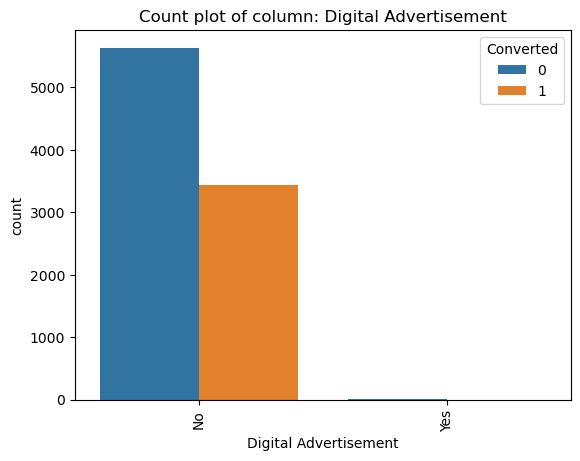

In [66]:
countplot(lead,'Digital Advertisement')

Almost all entries are No.

#### Checking for outliers

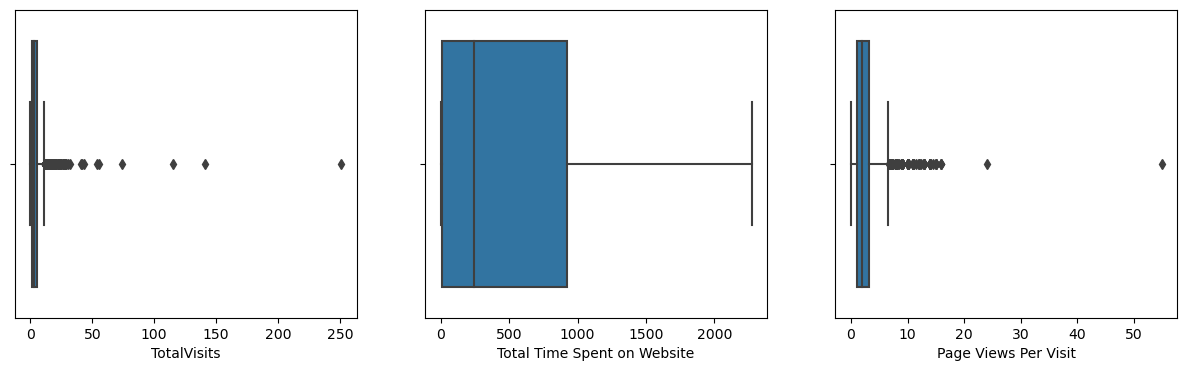

In [67]:
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=lead)

We can see there are Outliers in the TotalVisits and Page views per visit column.

In [68]:
# Finding the outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_list_outlier: 
    q1 = lead[col].quantile(0.10)
    q3 = lead[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    lead = lead.loc[(lead[col] > range_low) & (lead[col] < range_high)]

lead.shape

(8970, 30)

In [69]:
# Percentage of rows lost
(100 - 100*(len(lead.index)/9240))

2.922077922077932

We lost only 2.9% rows in the outlier treatment

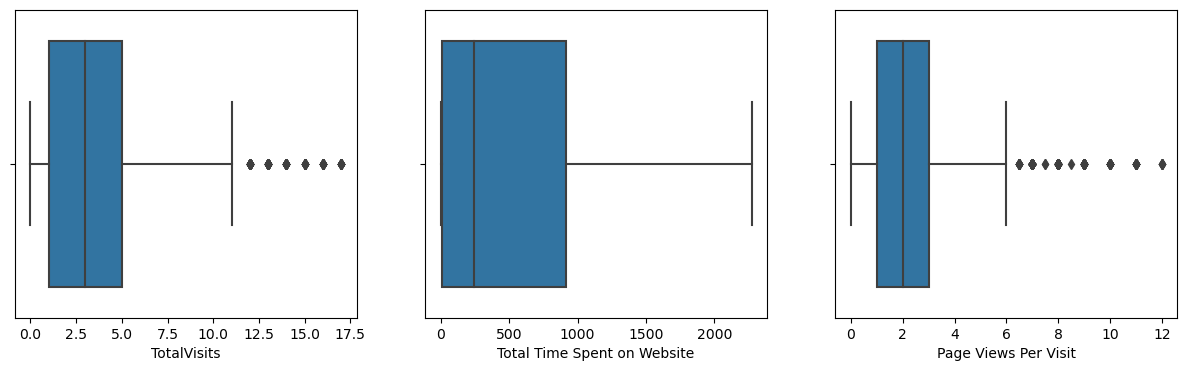

In [70]:
#Visualizing again
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=lead)

Based on univariate analysis we can drop some columns which are not useful for model building.

In [71]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview','What matters most to you in choosing a course'],axis=1)



In [72]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [73]:
lead.shape

(8970, 14)

In [74]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8970 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8970 non-null   object 
 1   Lead Origin                      8970 non-null   object 
 2   Lead Source                      8970 non-null   object 
 3   Do Not Email                     8970 non-null   object 
 4   Do Not Call                      8970 non-null   object 
 5   Converted                        8970 non-null   int64  
 6   TotalVisits                      8970 non-null   float64
 7   Total Time Spent on Website      8970 non-null   int64  
 8   Page Views Per Visit             8970 non-null   float64
 9   Last Activity                    8970 non-null   object 
 10  Specialization                   8970 non-null   object 
 11  What is your current occupation  8970 non-null   object 
 12  City                

## Data Preparation

In [75]:
#Mapping binary variable (Yes/No) to (1/0)
var_bin =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[var_bin] = lead[var_bin].apply(binary_map)

#### Dummy variable creation

In [76]:
dummy=pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                           'City',"Last Notable Activity"]],dtype=int,drop_first=True)

In [77]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
lead=lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                           'City',"Last Notable Activity"],axis=1)
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0


In [79]:
lead=pd.concat([lead,dummy],axis=1)

In [80]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Test-train split

In [81]:
X=lead.drop(['Prospect ID','Converted'],axis=1)
y=lead['Converted']
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 8970, dtype: int64


In [82]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
y_train.shape

(6279,)

In [84]:
X_train.shape

(6279, 69)

In [85]:
#Scaling the features
scaler= StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [86]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3825,-0.294143,-0.012621,-1.086657,-0.885830,-1.155787,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3307,-0.294143,-0.012621,0.285997,1.481982,0.848717,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5527,-0.294143,-0.012621,-1.086657,-0.885830,-1.155787,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5180,-0.294143,-0.012621,-1.086657,-0.885830,-1.155787,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7064,-0.294143,-0.012621,1.315488,1.410174,2.352095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


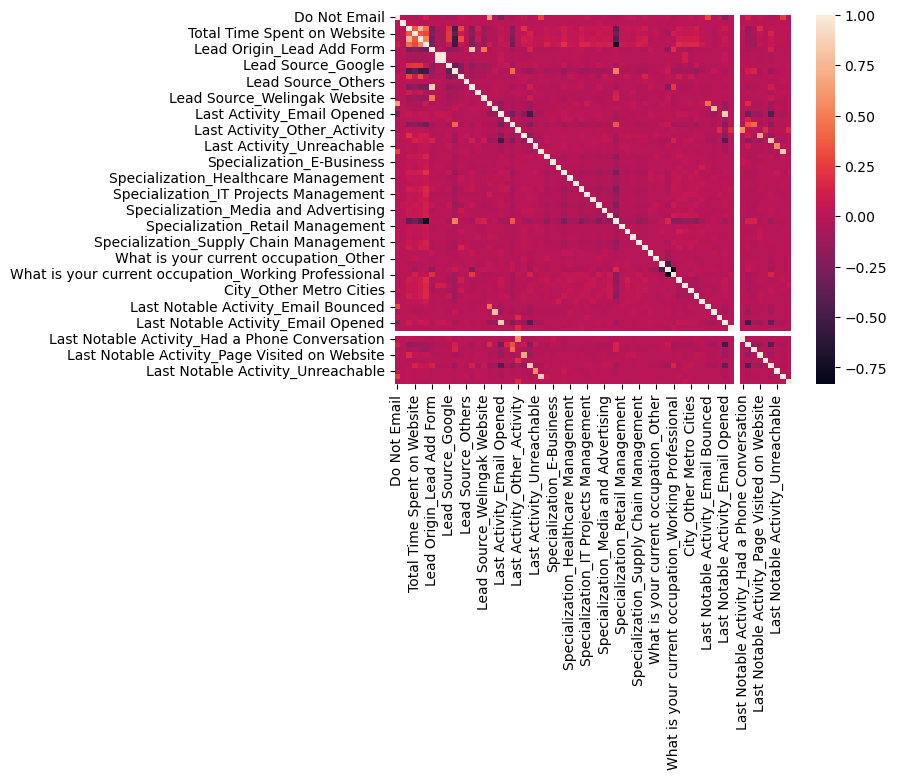

In [87]:
sns.heatmap(X_train.corr())
plt.show()

# Model building

In [88]:
logreg = LogisticRegression()

In [89]:
# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 13),
 ('Do Not Call', False, 41),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 6),
 ('Last Activity_SMS Sent', True, 1

In [92]:
# Checking the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Manage

#### Model 1

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.3
Date:                Mon, 19 Feb 2024   Deviance:                       5224.6
Time:                        10:06:24   Pearson chi2:                 6.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9150      0.636      1.439      0.150      -0.331       2.161
Total Time Spent on Website                              1.0988      0.040     27.166      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1489      0.127     -9.027      0.000      -1.398      -0.899
Lead Origin_Lead Add Form                                3.4658      0.252     13.740      0.000       2.971       3.960
Lead Source_Olark Chat                                   0.9732      0.120      8.128      0.000       0.739       1.208
Lead Source_Welingak Website                             2.2261      0.761      2.925      0.003       0.734       3.718
Last Activity_Email Link Clicked                         0.8530      0.345      2.472      0.013       0.177       1.529
Last Activity_Other_Activity                             1.8115      0.533      3.397      0.001       0.766       2.857
Last Activity_SMS Sent                                   1.3065      0.076     17.249      0.000       1.158       1.455
Last Activity_Unreachable                                0.3834      0.499      0.768      0.443      -0.596       1.362
Specialization_Hospitality Management                   -0.8684      0.329     -2.640      0.008      -1.513      -0.224
Specialization_Others                                   -1.1223      0.123     -9.089      0.000      -1.364      -0.880
What is your current occupation_Housewife               21.7124   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Student                 -0.7445      0.668     -1.114      0.265      -2.054       0.565
What is your current occupation_Unemployed              -1.0623      0.632     -1.680      0.093      -2.301       0.177
What is your current occupation_Working Professional     1.8619      0.664      2.804      0.005       0.560       3.163
Last Notable Activity_Email Link Clicked                -1.5177      0.438     -3.466      0.001      -2.376      -0.660
Last Notable Activity_Had a Phone Conversation           1.4215      1.229      1.156      0.248      -0.988       3.831
Last Notable Activity_Modified                          -1.1549      0.081    -14.280      0.000      -1.313      -0.996
Last Notable Activity_Olark Chat Conversation           -1.5030      0.327     -4.591      0.000      -2.145      -0.861
Last Notable Activity_Unreachable                        1.4045      0.736      1.907      0.057      -0.039       2.848
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [95]:
# Dropping the column 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife')

#### Model 2

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.2
Date:                Mon, 19 Feb 2024   Deviance:                       5228.4
Time:                        10:06:25   Pearson chi2:                 6.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3959      0.596      2.343      0.019       0.228       2.563
Total Time Spent on Website                              1.0978      0.040     27.156      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1439      0.127     -8.993      0.000      -1.393      -0.895
Lead Origin_Lead Add Form                                3.4717      0.252     13.768      0.000       2.977       3.966
Lead Source_Olark Chat                                   0.9734      0.120      8.129      0.000       0.739       1.208
Lead Source_Welingak Website                             2.2207      0.761      2.918      0.004       0.729       3.712
Last Activity_Email Link Clicked                         0.8544      0.345      2.476      0.013       0.178       1.531
Last Activity_Other_Activity                             1.8127      0.533      3.400      0.001       0.768       2.858
Last Activity_SMS Sent                                   1.3057      0.076     17.241      0.000       1.157       1.454
Last Activity_Unreachable                                0.3838      0.499      0.768      0.442      -0.595       1.363
Specialization_Hospitality Management                   -0.8682      0.329     -2.639      0.008      -1.513      -0.224
Specialization_Others                                   -1.1196      0.123     -9.071      0.000      -1.361      -0.878
What is your current occupation_Student                 -1.2287      0.628     -1.955      0.051      -2.460       0.003
What is your current occupation_Unemployed              -1.5462      0.590     -2.621      0.009      -2.703      -0.390
What is your current occupation_Working Professional     1.3776      0.624      2.208      0.027       0.155       2.601
Last Notable Activity_Email Link Clicked                -1.5172      0.437     -3.468      0.001      -2.375      -0.660
Last Notable Activity_Had a Phone Conversation           1.4186      1.229      1.154      0.249      -0.991       3.828
Last Notable Activity_Modified                          -1.1568      0.081    -14.305      0.000      -1.315      -0.998
Last Notable Activity_Olark Chat Conversation           -1.5027      0.327     -4.591      0.000      -2.144      -0.861
Last Notable Activity_Unreachable                        1.4028      0.736      1.905      0.057      -0.040       2.846
========================================================================================================================
"""

Last Activity_Unreachable has high p-value so we can drop this column.

In [97]:
col=col.drop("Last Activity_Unreachable")

#### Model 3

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.5
Date:                Mon, 19 Feb 2024   Deviance:                       5229.0
Time:                        10:06:25   Pearson chi2:                 6.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3922
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3920      0.595      2.338      0.019       0.225       2.559
Total Time Spent on Website                              1.0974      0.040     27.150      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.1407      0.127     -8.975      0.000      -1.390      -0.892
Lead Origin_Lead Add Form                                3.4735      0.252     13.777      0.000       2.979       3.968
Lead Source_Olark Chat                                   0.9720      0.120      8.120      0.000       0.737       1.207
Lead Source_Welingak Website                             2.2169      0.761      2.913      0.004       0.725       3.708
Last Activity_Email Link Clicked                         0.8473      0.345      2.457      0.014       0.171       1.523
Last Activity_Other_Activity                             1.8068      0.533      3.390      0.001       0.762       2.851
Last Activity_SMS Sent                                   1.3031      0.076     17.231      0.000       1.155       1.451
Specialization_Hospitality Management                   -0.8651      0.329     -2.626      0.009      -1.511      -0.220
Specialization_Others                                   -1.1184      0.123     -9.064      0.000      -1.360      -0.877
What is your current occupation_Student                 -1.2278      0.628     -1.955      0.051      -2.459       0.003
What is your current occupation_Unemployed              -1.5432      0.590     -2.617      0.009      -2.699      -0.387
What is your current occupation_Working Professional     1.3770      0.624      2.208      0.027       0.155       2.599
Last Notable Activity_Email Link Clicked                -1.5105      0.437     -3.454      0.001      -2.368      -0.653
Last Notable Activity_Had a Phone Conversation           1.4224      1.229      1.157      0.247      -0.987       3.832
Last Notable Activity_Modified                          -1.1503      0.080    -14.320      0.000      -1.308      -0.993
Last Notable Activity_Olark Chat Conversation           -1.5022      0.327     -4.590      0.000      -2.144      -0.861
Last Notable Activity_Unreachable                        1.7850      0.543      3.285      0.001       0.720       2.850
========================================================================================================================
"""

Last Notable Activity_Had a Phone Conversation has high p-value so we can drop this column.

In [99]:
col=col.drop("Last Notable Activity_Had a Phone Conversation")

#### Model 4

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.3
Date:                Mon, 19 Feb 2024   Deviance:                       5230.6
Time:                        10:06:25   Pearson chi2:                 6.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3946      0.596      2.342      0.019       0.227       2.562
Total Time Spent on Website                              1.0965      0.040     27.138      0.000       1.017       1.176
Lead Origin_Landing Page Submission                     -1.1407      0.127     -8.978      0.000      -1.390      -0.892
Lead Origin_Lead Add Form                                3.4734      0.252     13.775      0.000       2.979       3.968
Lead Source_Olark Chat                                   0.9710      0.120      8.111      0.000       0.736       1.206
Lead Source_Welingak Website                             2.2187      0.761      2.916      0.004       0.727       3.710
Last Activity_Email Link Clicked                         0.8520      0.345      2.471      0.013       0.176       1.528
Last Activity_Other_Activity                             2.1459      0.455      4.721      0.000       1.255       3.037
Last Activity_SMS Sent                                   1.3021      0.076     17.220      0.000       1.154       1.450
Specialization_Hospitality Management                   -0.8658      0.329     -2.629      0.009      -1.511      -0.220
Specialization_Others                                   -1.1222      0.123     -9.095      0.000      -1.364      -0.880
What is your current occupation_Student                 -1.2269      0.628     -1.953      0.051      -2.458       0.004
What is your current occupation_Unemployed              -1.5420      0.590     -2.614      0.009      -2.698      -0.386
What is your current occupation_Working Professional     1.3735      0.624      2.202      0.028       0.151       2.596
Last Notable Activity_Email Link Clicked                -1.5172      0.437     -3.469      0.001      -2.374      -0.660
Last Notable Activity_Modified                          -1.1565      0.080    -14.417      0.000      -1.314      -0.999
Last Notable Activity_Olark Chat Conversation           -1.5023      0.327     -4.590      0.000      -2.144      -0.861
Last Notable Activity_Unreachable                        1.7816      0.543      3.279      0.001       0.717       2.846
========================================================================================================================
"""

p-value of 'What is your current occupation_Student' >0.0.5 hence dropping this column.

In [101]:
col=col.drop("What is your current occupation_Student")

#### Model 5

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.3
Date:                Mon, 19 Feb 2024   Deviance:                       5234.7
Time:                        10:06:25   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3462      0.232      1.491      0.136      -0.109       0.801
Total Time Spent on Website                              1.0970      0.040     27.169      0.000       1.018       1.176
Lead Origin_Landing Page Submission                     -1.1525      0.127     -9.087      0.000      -1.401      -0.904
Lead Origin_Lead Add Form                                3.4762      0.252     13.793      0.000       2.982       3.970
Lead Source_Olark Chat                                   0.9653      0.120      8.068      0.000       0.731       1.200
Lead Source_Welingak Website                             2.2160      0.761      2.912      0.004       0.725       3.708
Last Activity_Email Link Clicked                         0.8472      0.345      2.455      0.014       0.171       1.524
Last Activity_Other_Activity                             2.1452      0.455      4.718      0.000       1.254       3.036
Last Activity_SMS Sent                                   1.2994      0.076     17.182      0.000       1.151       1.448
Specialization_Hospitality Management                   -0.8740      0.330     -2.652      0.008      -1.520      -0.228
Specialization_Others                                   -1.1349      0.123     -9.212      0.000      -1.376      -0.893
What is your current occupation_Unemployed              -0.4802      0.204     -2.353      0.019      -0.880      -0.080
What is your current occupation_Working Professional     2.4339      0.289      8.414      0.000       1.867       3.001
Last Notable Activity_Email Link Clicked                -1.5153      0.437     -3.465      0.001      -2.372      -0.658
Last Notable Activity_Modified                          -1.1568      0.080    -14.431      0.000      -1.314      -1.000
Last Notable Activity_Olark Chat Conversation           -1.5103      0.327     -4.612      0.000      -2.152      -0.868
Last Notable Activity_Unreachable                        1.7791      0.543      3.274      0.001       0.714       2.844
========================================================================================================================
"""

All p-values are less than 0.05 lets check VIF now.

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,9.21
1,Lead Origin_Landing Page Submission,5.42
9,Specialization_Others,3.92
5,Last Activity_Email Link Clicked,2.84
12,Last Notable Activity_Email Link Clicked,2.84
3,Lead Source_Olark Chat,2.15
2,Lead Origin_Lead Add Form,1.85
13,Last Notable Activity_Modified,1.76
11,What is your current occupation_Working Profes...,1.66
7,Last Activity_SMS Sent,1.61


'What is your current occupation_Unemployed' column has high VIF value so we can drop this column.

In [104]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col = col.drop('What is your current occupation_Unemployed')

#### Model 6

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.1
Date:                Mon, 19 Feb 2024   Deviance:                       5240.1
Time:                        10:06:26   Pearson chi2:                 6.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1125      0.125     -0.900      0.368      -0.357       0.133
Total Time Spent on Website                              1.0979      0.040     27.200      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1557      0.127     -9.110      0.000      -1.404      -0.907
Lead Origin_Lead Add Form                                3.4969      0.252     13.887      0.000       3.003       3.990
Lead Source_Olark Chat                                   0.9725      0.120      8.132      0.000       0.738       1.207
Lead Source_Welingak Website                             2.1885      0.761      2.877      0.004       0.697       3.680
Last Activity_Email Link Clicked                         0.8434      0.345      2.445      0.014       0.167       1.519
Last Activity_Other_Activity                             2.1301      0.455      4.684      0.000       1.239       3.021
Last Activity_SMS Sent                                   1.2886      0.075     17.094      0.000       1.141       1.436
Specialization_Hospitality Management                   -0.8788      0.330     -2.667      0.008      -1.525      -0.233
Specialization_Others                                   -1.1433      0.123     -9.272      0.000      -1.385      -0.902
What is your current occupation_Working Professional     2.8987      0.212     13.690      0.000       2.484       3.314
Last Notable Activity_Email Link Clicked                -1.5100      0.437     -3.457      0.001      -2.366      -0.654
Last Notable Activity_Modified                          -1.1589      0.080    -14.460      0.000      -1.316      -1.002
Last Notable Activity_Olark Chat Conversation           -1.5040      0.327     -4.594      0.000      -2.146      -0.862
Last Notable Activity_Unreachable                        1.7607      0.543      3.240      0.001       0.696       2.826
========================================================================================================================
"""

In [106]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Link Clicked,2.84
11,Last Notable Activity_Email Link Clicked,2.84
9,Specialization_Others,2.19
3,Lead Source_Olark Chat,1.95
1,Lead Origin_Landing Page Submission,1.71
12,Last Notable Activity_Modified,1.69
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.55
4,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.30


This is our final model as all the p-values and VIF are well within the range.

## Making prediction

In [107]:
# Getting the predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3825    0.777807
3307    0.838548
5527    0.082057
5180    0.508189
7064    0.807796
6246    0.180464
701     0.181438
6908    0.183206
4078    0.377451
2940    0.852061
dtype: float64

In [108]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77780685, 0.83854841, 0.08205715, 0.50818914, 0.80779557,
       0.18046364, 0.18143786, 0.1832064 , 0.37745053, 0.85206053])

In [109]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.777807,3825
1,1,0.838548,3307
2,0,0.082057,5527
3,1,0.508189,5180
4,1,0.807796,7064


substituing 0&1 for 0.5 cutoff

In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.777807,3825,1
1,1,0.838548,3307,1
2,0,0.082057,5527,0
3,1,0.508189,5180,1
4,1,0.807796,7064,1


#### Creating Confusion Matrix

In [111]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3442,  434],
       [ 722, 1681]], dtype=int64)

In [112]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3442      434
# converted            722       1681  

In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8158942506768594

our accuracy is around 81% which is good

In [114]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [115]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6995422388680815


In [116]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8880288957688338


 sensitivity is 69.9% and specificity is 88.8% which is good

In [117]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11197110423116616


In [118]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7947990543735225


In [119]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8266090297790586


We can see that our specificificity is good (88%) but sensitivity is only 69%. Sensitivity is low mainly because of the cut off point '0.5', whcih was arbitrarily chosen. We need to optimise the value of cut-off point to get good sensitivity, we can use ROC curve to find the optimal cut-off.

### Plotting ROC curve

In [120]:
def droc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

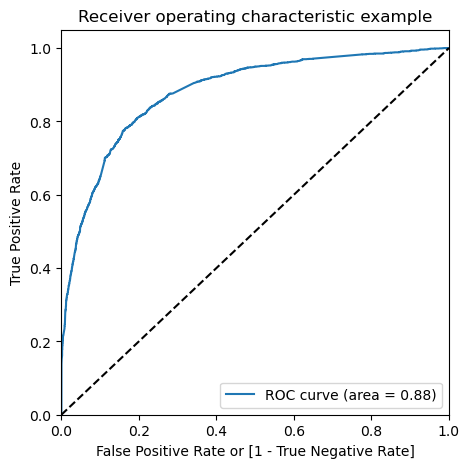

In [122]:
droc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC Curve area should be a value closer to 1. We are getting a value of 0.88 indicating a good predictive model.

### Finding Optimal cut off point

Initially we had chosen an arbitrary cut off of 0.5 but we need to determine the best cut off point. The optimal cutoff on logistic regression probabilities is the intersection point at which there is a balance between sensitivity and specificity.

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.777807,3825,1,1,1,1,1,1,1,1,1,0,0
1,1,0.838548,3307,1,1,1,1,1,1,1,1,1,1,0
2,0,0.082057,5527,0,1,0,0,0,0,0,0,0,0,0
3,1,0.508189,5180,1,1,1,1,1,1,1,0,0,0,0
4,1,0.807796,7064,1,1,1,1,1,1,1,1,1,1,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382704  1.000000  0.000000
0.1   0.1  0.604555  0.968373  0.378999
0.2   0.2  0.739608  0.913442  0.631837
0.3   0.3  0.796624  0.836038  0.772188
0.4   0.4  0.815098  0.774449  0.840299
0.5   0.5  0.815894  0.699542  0.888029
0.6   0.6  0.796464  0.591344  0.923633
0.7   0.7  0.783883  0.516854  0.949432
0.8   0.8  0.756331  0.409488  0.971362
0.9   0.9  0.721612  0.291303  0.988390


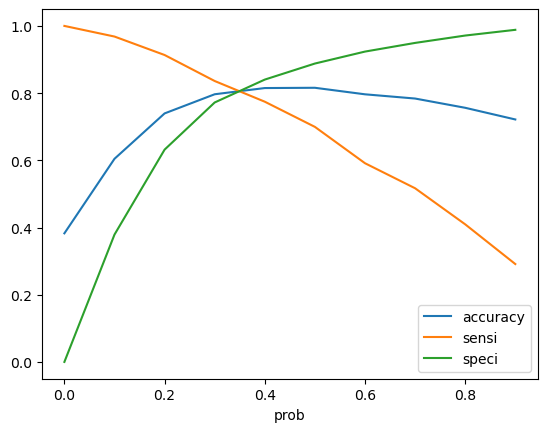

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the above curve, the best value to use as a cutoff probability is 0.35.

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.777807,3825,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.838548,3307,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.082057,5527,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.508189,5180,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.807796,7064,1,1,1,1,1,1,1,1,1,1,0,1


In [127]:
#Assigning lead score to the train data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.777807,3825,1,1,1,1,1,1,1,1,1,0,0,1,78
1,1,0.838548,3307,1,1,1,1,1,1,1,1,1,1,0,1,84
2,0,0.082057,5527,0,1,0,0,0,0,0,0,0,0,0,0,8
3,1,0.508189,5180,1,1,1,1,1,1,1,0,0,0,0,1,51
4,1,0.807796,7064,1,1,1,1,1,1,1,1,1,1,0,1,81


## Model Evaluation

In [128]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8068163720337633


In [129]:
# creating Confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3134,  742],
       [ 471, 1932]], dtype=int64)

In [130]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3134      742
# converted            471       1932 

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's check the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8039950062421972


In [133]:
# Let's calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8085655314757482


In [134]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1914344685242518


In [135]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Positive Predictive Value : 0.7225130890052356
Negative Predictive Value :  0.8693481276005548


### Precision and Recall

Precision is defined as the ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples (either correctly or incorrectly).

Recall is defined as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. 

In [136]:
#Checking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3134,  742],
       [ 471, 1932]], dtype=int64)

In [137]:
# Calculating Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7225130890052356


In [138]:
# Calculating Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8039950062421972


In [139]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

Precision : 0.7225130890052356


In [140]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8039950062421972

### Precision and Recall tradeoff

In [141]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6274    1
 6275    0
 6276    1
 6277    1
 6278    1
 Name: Converted, Length: 6279, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 6274    1
 6275    0
 6276    1
 6277    1
 6278    1
 Name: final_predicted, Length: 6279, dtype: int64)

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

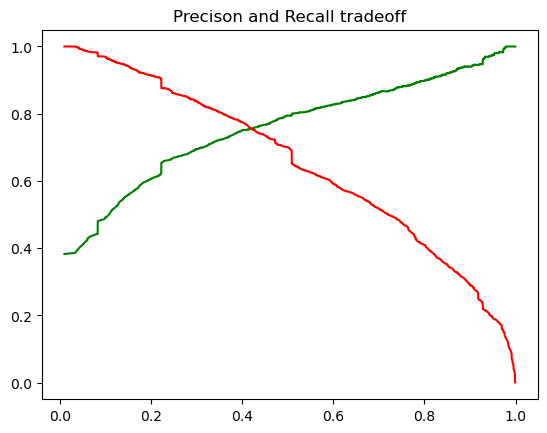

In [143]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precison and Recall tradeoff")
plt.show()

### Making predictions on test set

In [144]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
341,-0.280280,-0.019281,0.249221,-0.041537,-0.175072,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5449,-0.280280,-0.019281,-0.082621,0.918562,0.338453,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6360,-0.280280,-0.019281,0.912904,-0.388341,-0.585891,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5091,3.567855,-0.019281,-0.082621,-0.433973,0.338453,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6311,-0.280280,-0.019281,-0.082621,-0.662134,0.338453,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [145]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
341,-0.041537,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5449,0.918562,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6360,-0.388341,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5091,-0.433973,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6311,-0.662134,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [146]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

341     0.078692
5449    0.435446
6360    0.399885
5091    0.387925
6311    0.119377
4897    0.493042
919     0.108194
7281    0.051488
3789    0.243040
6917    0.093445
dtype: float64

In [147]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
y_pred_1.head()

,0
341,0.078692
5449,0.435446
6360,0.399885
5091,0.387925
6311,0.119377


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Setting Prospect ID as index
y_test_df['Prospect ID'] = y_test_df.index

In [151]:
y_test_df

,Converted,Prospect ID
341,0,341
5449,0,5449
6360,1,6360
5091,0,5091
6311,0,6311
...,...,...
562,0,562
3277,0,3277
897,0,897
1822,0,1822


In [152]:
# Removing index from both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final

,Converted,Prospect ID,0
0,0,341,0.078692
1,0,5449,0.435446
2,1,6360,0.399885
3,0,5091,0.387925
4,0,6311,0.119377
...,...,...,...
2686,0,562,0.051020
2687,0,3277,0.031658
2688,0,897,0.172752
2689,0,1822,0.106466


In [155]:
#Renaming the column.
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [157]:
y_pred_final

,Prospect ID,Converted,Converted_prob
0,341,0,0.078692
1,5449,0,0.435446
2,6360,1,0.399885
3,5091,0,0.387925
4,6311,0,0.119377
...,...,...,...
2686,562,0,0.051020
2687,3277,0,0.031658
2688,897,0,0.172752
2689,1822,0,0.106466


In [158]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [159]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,341,0,0.078692,0
1,5449,0,0.435446,1
2,6360,1,0.399885,1
3,5091,0,0.387925,1
4,6311,0,0.119377,0


In [160]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [161]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,341,0,0.078692,0,8
1,5449,0,0.435446,1,44
2,6360,1,0.399885,1,40
3,5091,0,0.387925,1,39
4,6311,0,0.119377,0,12


In [162]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.804162021553326


In [163]:
#creating the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1371,  332],
       [ 195,  793]], dtype=int64)

In [164]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [165]:
# Let's check the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8026315789473685


In [166]:
# Let's calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.805049911920141


In [167]:
#Precision score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7048888888888889

In [168]:
#Recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8026315789473685

After evaluation the model on test data we obtained: <br>
Accuracy: 80.4% <br>
Sensitivity: 80.3% <br>
Specificity: 80.5%

**Final Results** <br>
**Train Data**<br>
Accuracy: 80.68% <br>
Sensitivity: 80.4% <br>
Specificity: 80.86% <br>

**Test Data** <br>
Accuracy: 80.4% <br>
Sensitivity: 80.3% <br>
Specificity: 80.5% <br>

We have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

In [169]:
### Finding Hot leads from the given data
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
14,392,1,0.962753,1,96
18,2815,0,0.854743,1,85
24,2524,1,0.980583,1,98
32,4123,1,0.997657,1,100
33,8403,1,0.991480,1,99
...,...,...,...,...,...
2660,4909,1,0.983469,1,98
2663,5337,0,0.995933,1,100
2667,4826,1,0.868366,1,87
2678,8993,1,0.849951,1,85


So there are 423 hot leads in the given dataset which should be contacted as they have high conversion rate.

In [170]:
#Fiding the important features from our model.
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.496865
What is your current occupation_Working Professional    2.898679
Lead Source_Welingak Website                            2.188536
Last Activity_Other_Activity                            2.130055
Last Notable Activity_Unreachable                       1.760726
Last Activity_SMS Sent                                  1.288559
Total Time Spent on Website                             1.097892
Lead Source_Olark Chat                                  0.972472
Last Activity_Email Link Clicked                        0.843402
const                                                  -0.112469
Specialization_Hospitality Management                  -0.878796
Specialization_Others                                  -1.143257
Lead Origin_Landing Page Submission                    -1.155679
Last Notable Activity_Modified                         -1.158920
Last Notable Activity_Olark Chat Conversation          -1.504043
Last Notable Activity_Ema